In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm


In [26]:
DF= pd.read_csv("data2.tsv", delimiter="\s+", header=None)

In [27]:
Y = DF[1].values  
time = DF[0].values

In [29]:
X = np.array([time**i for i in range(5)]).T

In [30]:
XtXinv = np.linalg.inv(X.T@X)

In [31]:
theta = XtXinv@X.T@Y
theta

array([ 1.70685191,  5.8999    ,  1.27757955,  3.91308752, -0.49000126])

In [32]:
predictions = X@theta

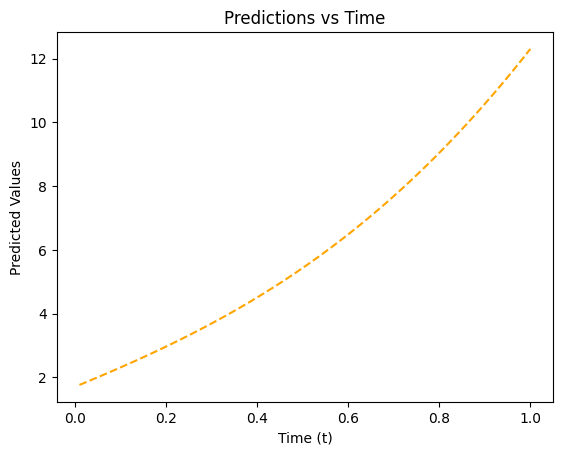

In [33]:
plt.plot(time, predictions, linestyle='--', color='orange', markersize=8)
plt.xlabel("Time (t)")
plt.ylabel("Predicted Values")
plt.title("Predictions vs Time")
plt.show()

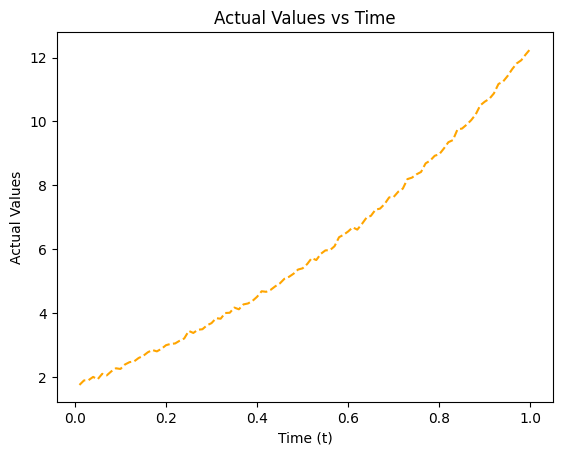

In [34]:
plt.plot(time, Y, linestyle='--', color='orange', markersize=8)
plt.xlabel("Time (t)")
plt.ylabel("Actual Values")
plt.title("Actual Values vs Time")
plt.show()

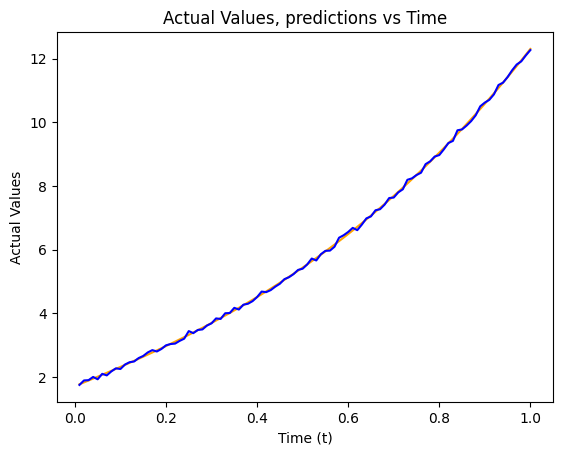

In [35]:
plt.plot(time, predictions, label='y_pred', color='orange')
plt.plot(time, Y, label='y_true', color='blue')
plt.xlabel("Time (t)")
plt.ylabel("Actual Values")
plt.title("Actual Values, predictions vs Time")
plt.show()

In [36]:
errors = Y - predictions

<function matplotlib.pyplot.show(close=None, block=None)>

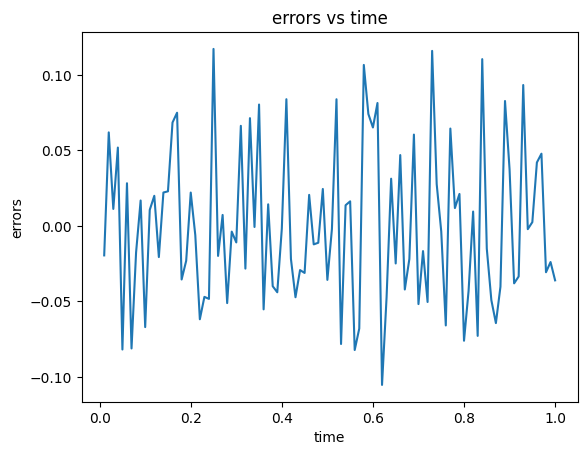

In [37]:
plt.plot(time,errors)
plt.xlabel('time')
plt.ylabel('errors')
plt.title('errors vs time')
plt.show

In [38]:
least_squared_error = np.sum(errors*errors)
least_squared_error

0.2684896837690878

In [39]:
from scipy.stats import shapiro

stat, p_value = shapiro(errors)
print(f"Shapiro-Wilk Test statistic: {stat:.4f}, p-value: {p_value:.4f}")

if p_value > 0.05:
    print("The errors are normally distributed (fail to reject H0).")
else:
    print("The errors are not normally distributed (reject H0).")


Shapiro-Wilk Test statistic: 0.9709, p-value: 0.0258
The errors are not normally distributed (reject H0).


In [40]:
variance = np.var(errors)
variance

0.002684896837690879

In [55]:
mat_fisher = 1/variance * X.T@X

In [60]:
vc = np.linalg.inv(mat_fisher)

In [61]:
SOE = np.sqrt(np.diag(vc))

In [64]:
confidence_level = 0.95
alpha = 1 - confidence_level
z_normal = norm.ppf(1 - alpha / 2)
lb = theta - z_normal * SOE
ub = theta + z_normal * SOE

results = pd.DataFrame({
    'Parameter': [f'theta_{i}' for i in range(len(theta))],
    'Lower Bound': lb,
    'Upper Bound': ub
})

print(results)

  Parameter  Lower Bound  Upper Bound
0   theta_0     1.652868     1.760836
1   theta_1     5.167124     6.632676
2   theta_2    -1.652053     4.207212
3   theta_3    -0.434836     8.261011
4   theta_4    -2.625912     1.645909
